In [1]:
import os
import os.path
from subprocess import Popen, PIPE
import numpy as np
import pandas as pd
import time
import seaborn as sns
import os
import errno
from scipy import signal
from scipy.signal import savgol_filter
from scipy import interpolate
from scipy.interpolate import spline
from scipy.signal import argrelextrema
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#modify some matplotlib parameters to manage the images for illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
plt.style.use("seaborn-white")
#fivethirtyeight
#matplotlib.style.use('seaborn-dark-palette')
#matplotlib.style.use('seaborn-paper')
sns.set_style("ticks")
#matplotlib.style.use("seaborn-colorblind")

In [4]:
#defining usefull list for the names of the sensors
lista=list(range(1, 25))
lista;
listb=list(range(25, 49))
listb;

In [5]:
type_of_sensor=["A","A_T","B","B_T"]

In [6]:
a=filt(result_A,str(lista[1]))
result_A.Sensor

NameError: name 'filt' is not defined

In [ ]:
frames=[]
names=[]
for n in lista:
    dfa=pd.read_csv("ZK/%sA.csv" %n,header=1,names=("Time","Y_value"))
    arow2=[0,0]
    dfa.loc[len(dfa)] = arow2
    dfa=dfa.sort_values(by=["Time"])
    Name= "%sA" %  n
    dfa["Sensor"] = Name
    frames.append(dfa)
    names.append(Name)
result_A = pd.concat(frames)
result_A;


In [ ]:
frames=[]
names=[]
for n in lista:
    dfa=pd.read_csv("ZK/%sA_T.csv" %n,header=1,names=("Time","Y_value"))
    arow2=[0,0]
    dfa.loc[len(dfa)] = arow2
    dfa=dfa.sort_values(by=["Time"])
    Name= "%sA" %  n
    dfa["Sensor"] = Name
    frames.append(dfa)
    names.append(Name)
result_AT = pd.concat(frames)
result_AT;


In [ ]:
frames=[]
names_B=[]
for n in listb:
    dfa=pd.read_csv("ZK/%sB_T.csv" %n,header=1,names=("Time","Y_value"))
    arow2=[0,0]
    dfa.loc[len(dfa)] = arow2
    dfa=dfa.sort_values(by=["Time"])
    Name= "%sB" %  n
    dfa["Sensor"] = Name
    frames.append(dfa)
    names_B.append(Name)
result_BT = pd.concat(frames)
result_BT

In [ ]:
frames=[]
names_B=[]
for n in listb:
    dfa=pd.read_csv("ZK/%sB.csv" %n,header=1,names=("Time","Y_value"))
    arow2=[0,0]
    dfa.loc[len(dfa)] = arow2
    dfa=dfa.sort_values(by=["Time"])
    Name= "%sB" %  n
    dfa["Sensor"] = Name
    frames.append(dfa)
    names_B.append(Name)
result_B = pd.concat(frames)
result_B

In [ ]:
def filt(df,Sensor_name):
    B1=df.loc[lambda df: (df.Sensor ==(str(Sensor_name))) ,:]
    return B1  B1=df.loc[lambda df: (df.Sensor ==(str(Sensor_name))) ,:]

In [ ]:
names_B

In [ ]:
result_A

In [ ]:
a=filt(result_A,str(lista[1]))
b=filt(result_AT,"2A")
b.Y_value

In [ ]:
tck = interpolate.splrep(b.Time, b.Y_value, s=0)
xnew = np.arange(0, 800, 10)
ynew = interpolate.splev(xnew, tck, der=0)


In [ ]:
    
    tck_A = interpolate.splrep(a.Time, a.Y_value, s=0.1)
    tck_AT = interpolate.splrep(b.Time, b.Y_value, s=0.1)
    

    #plt.plot(xnew,ynew)
    
    
    xnew = np.arange(0, 780, 6)
    xlin = np.arange(30, 150, 6)
    ynew_ON = interpolate.splev(xnew, tck_AT, der=0)
    ynew_ON_lin= interpolate.splev(xlin, tck_AT, der=0)


    f = interpolate.interp1d(xnew, ynew_ON)
    f_lin = interpolate.interp1d(xlin, ynew_ON_lin)
    ylin = f(xlin) 
    z = np.polyfit(xlin, ylin, 1)
    y_line = xlin * z[0] + z[1]

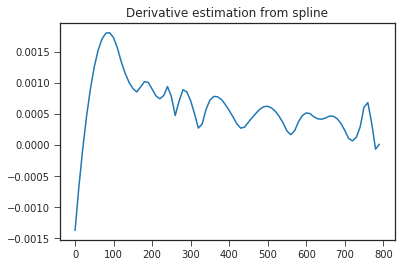

In [73]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder)
#plt.legend(['Cubic Spline', 'True'])
#plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

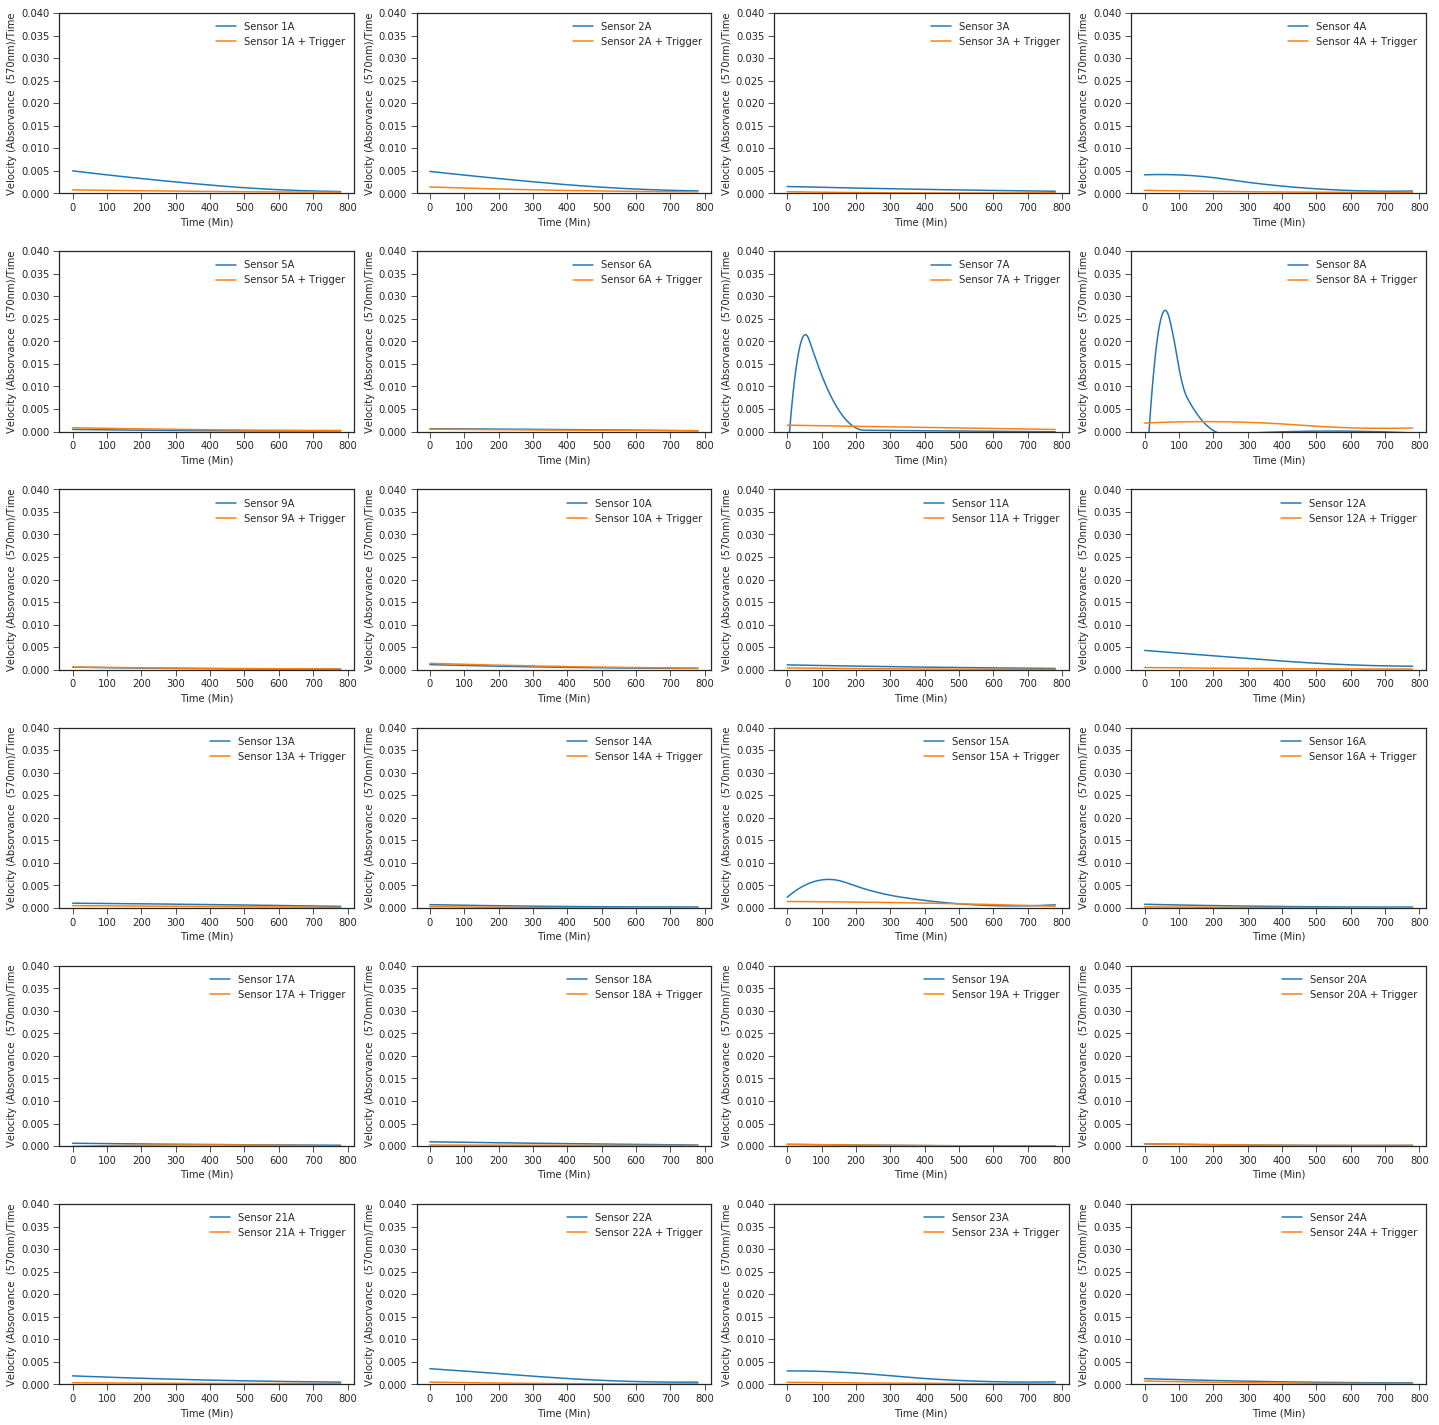

In [124]:
plt.figure(figsize=(20,20))
c=0
for i in range(len(names)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_A,str(names[i]))
    b=filt(result_AT,str(names[i]))
    
    tck_A = interpolate.splrep(a.Time, a.Y_value, s=0.01)
    tck_AT = interpolate.splrep(b.Time, b.Y_value, s=0.01)
    
    xnew = np.arange(0, 780, 0.01)
    ynew_ON = interpolate.splev(xnew, tck_AT, der=1)
    ynew_OFF = interpolate.splev(xnew, tck_A, der=1)
    
    #yder = interpolate.splev(xnew, tck_ON, der=1)
    
    plt.plot(xnew,ynew_ON,label="Sensor %s" % str(names[i]))
    plt.ylabel("Velocity (Absorvance  (570nm)/Time")
    plt.xlabel("Time (Min)")
    plt.plot(xnew,ynew_OFF,label="Sensor %s + Trigger"  % str(names[i]))
    plt.ylim(0,0.04)
    plt.legend(loc=0)
plt.tight_layout()
plt.savefig("try_vel.pdf",dpi=600);
#plt.savefig("SerieA.jpg",dpi=600)

[0.0006710408757899616,
 0.0011909859597117206,
 0.0002560193585245958,
 0.0005511860791908458,
 0.0007212585329787061,
 0.0004658670907661313,
 0.0012950391689025228,
 0.0023373460814559545,
 0.0005168178985820397,
 0.0012240219726359612,
 0.0003243345058591614,
 0.0004148470044141405,
 0.00045474559293639546,
 0.0002143550200274705,
 0.001378827382553175,
 0.0001923096036125199,
 8.135650753184116e-05,
 0.00022276836465429326,
 0.0003121655320163971,
 0.00041164832271734853,
 0.0003020411500745331,
 0.000387018926535006,
 0.00038487435367334257,
 0.0005921002854269737]

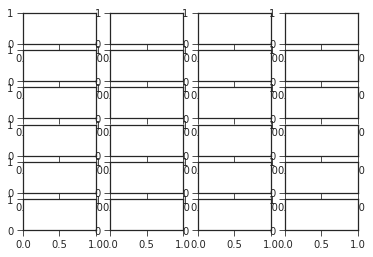

In [170]:
ON=[]
OFF=[]
for i in range(len(names)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_A,str(names[i]))
    b=filt(result_AT,str(names[i]))
    
    tck_A = interpolate.splrep(a.Time, a.Y_value, s=0.1)
    tck_AT = interpolate.splrep(b.Time, b.Y_value, s=0.1)
    

    #plt.plot(xnew,ynew)
    
    
    xnew = np.arange(0, 780, 6)
    xlin = np.arange(30, 150, 6)
    ynew_ON = interpolate.splev(xnew, tck_AT, der=0)
    ynew_ON_lin= interpolate.splev(xlin, tck_AT, der=0)
    
    ynew_OFF = interpolate.splev(xnew, tck_A, der=0)
    ynew_OFF_lin= interpolate.splev(xlin, tck_A, der=0)


    f = interpolate.interp1d(xnew, ynew_ON)
    f_lin = interpolate.interp1d(xlin, ynew_ON_lin)
    ylin =  f_lin(xlin) 
    z = np.polyfit(xlin, ylin, 1)
    ON.append(z[0])
    
    
    f = interpolate.interp1d(xnew, ynew_OFF)
    f_lin = interpolate.interp1d(xlin, ynew_OFF_lin)
    ylinOF = f_lin(xlin) 
    
    
    w = np.polyfit(xlin, ylinOF, 1)
   
    OFF.append(w[0])
OFF


In [171]:
a=np.divide(ON,OFF)
a

array([ 6.3160582 ,  3.51125786,  5.28352312,  7.84987109,  0.52738788,
        1.25912759, 10.08289058,  6.28371632,  0.90308177,  0.78579543,
        2.90507606,  9.19431286,  2.17697021,  2.82382978,  4.34765396,
        3.46855102,  6.89586848,  3.84293993,  1.        ,  1.        ,
        5.37788311,  7.96344149,  8.02839841,  1.79819357])

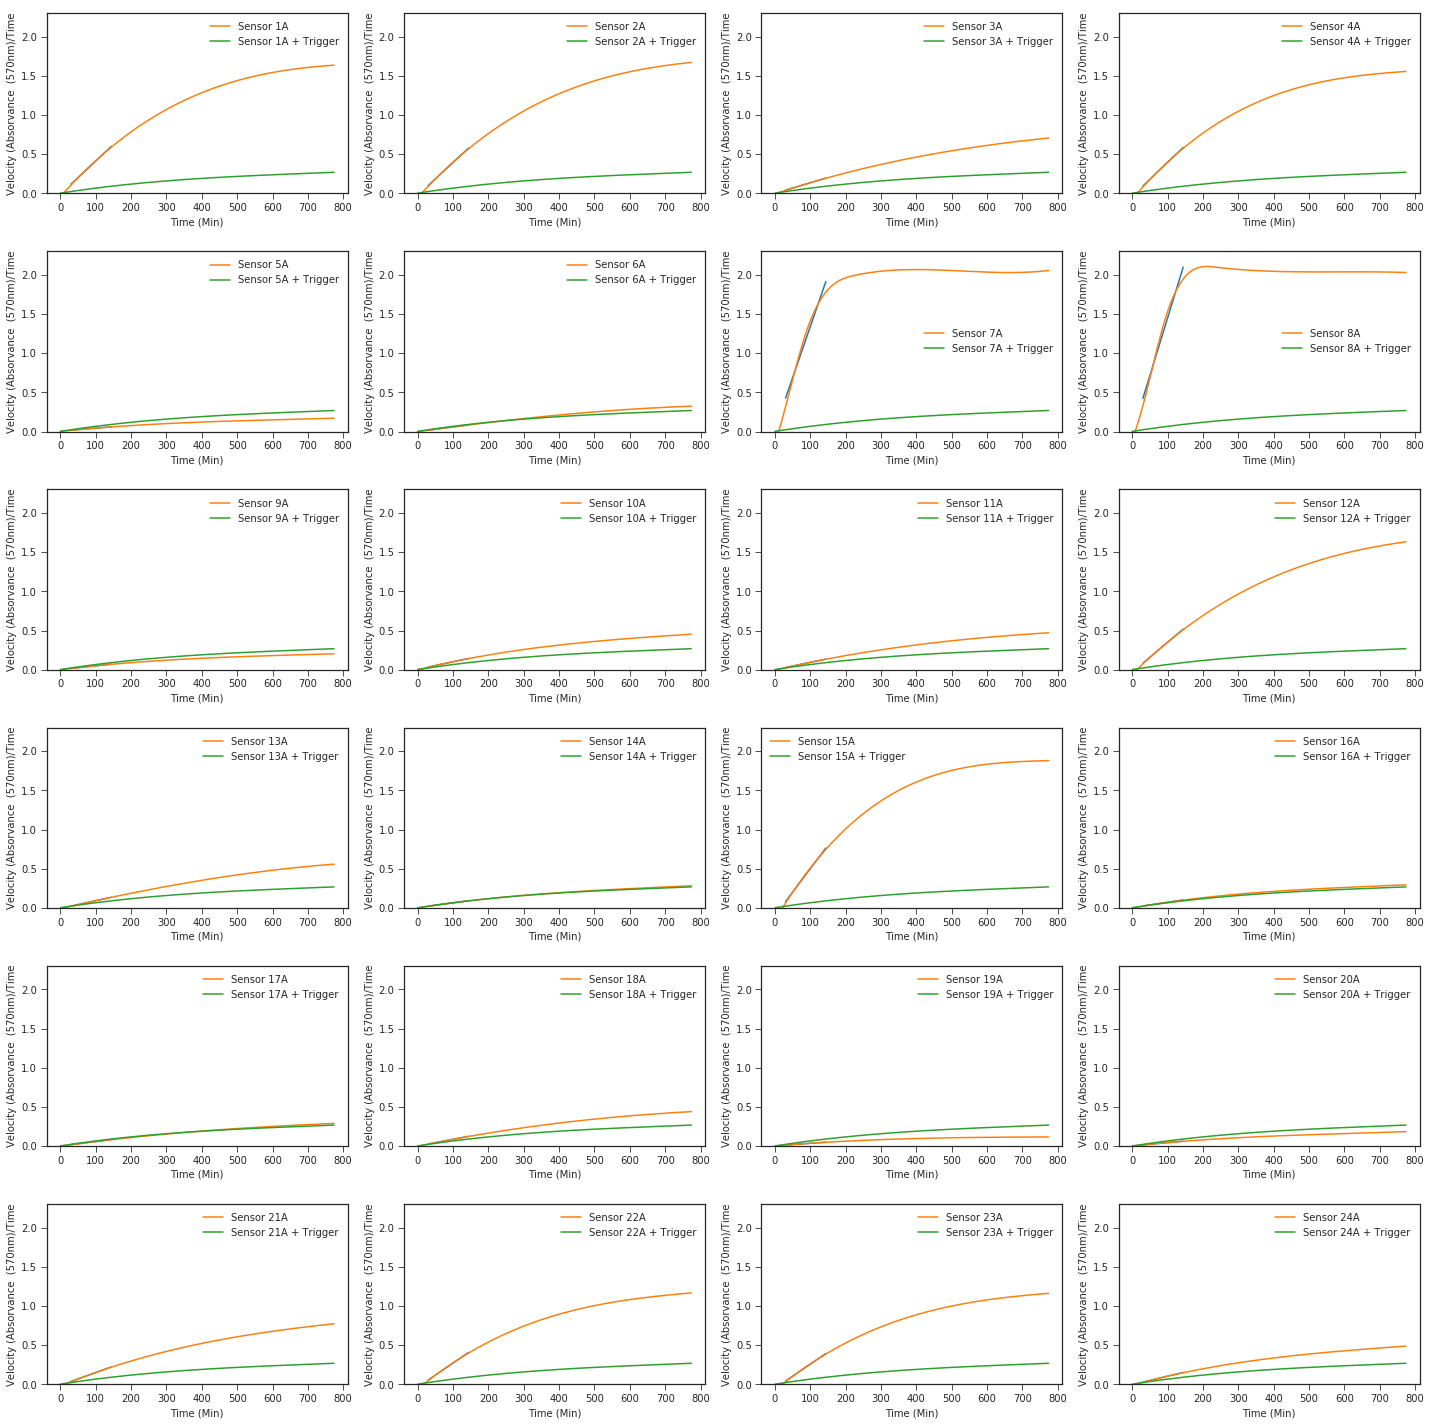

In [160]:
plt.figure(figsize=(20,20))
c=0
for i in range(len(names)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_A,str(names[i]))
    b=filt(result_AT,str(names[i]))
    
    tck_A = interpolate.splrep(a.Time, a.Y_value, s=0.1)
    tck_AT = interpolate.splrep(b.Time, b.Y_value, s=0.1)
    

    #plt.plot(xnew,ynew)
    
    
    xnew = np.arange(0, 780, 6)
    xlin = np.arange(30, 150, 6)
    ynew_ON = interpolate.splev(xnew, tck_AT, der=0)
    ynew_ON_lin= interpolate.splev(xlin, tck_AT, der=0)


    f = interpolate.interp1d(xnew, ynew_ON)
    f_lin = interpolate.interp1d(xlin, ynew_ON_lin)
    ylin = f(xlin) 
    z = np.polyfit(xlin, ylin, 1)
    y_line = xlin * z[0] + z[1]
    
    plt.plot(xlin, y_line)
    
    ynew = f(xnew) 
    Y_200=f(200)

    #yder = interpolate.splev(xnew, tck_ON, der=1)
    
    plt.plot(xnew,ynew_ON,label="Sensor %s" % str(names[i]))
    plt.ylabel("Velocity (Absorvance  (570nm)/Time")
    plt.xlabel("Time (Min)")
    plt.plot(xnew,ynew_OFF,label="Sensor %s + Trigger"  % str(names[i]))
    plt.ylim(0,2.3)
    plt.legend(loc=0)
plt.tight_layout()
plt.savefig("try_ON_OFF.pdf",dpi=600)
#plt.savefig("SerieA.jpg",dpi=600)

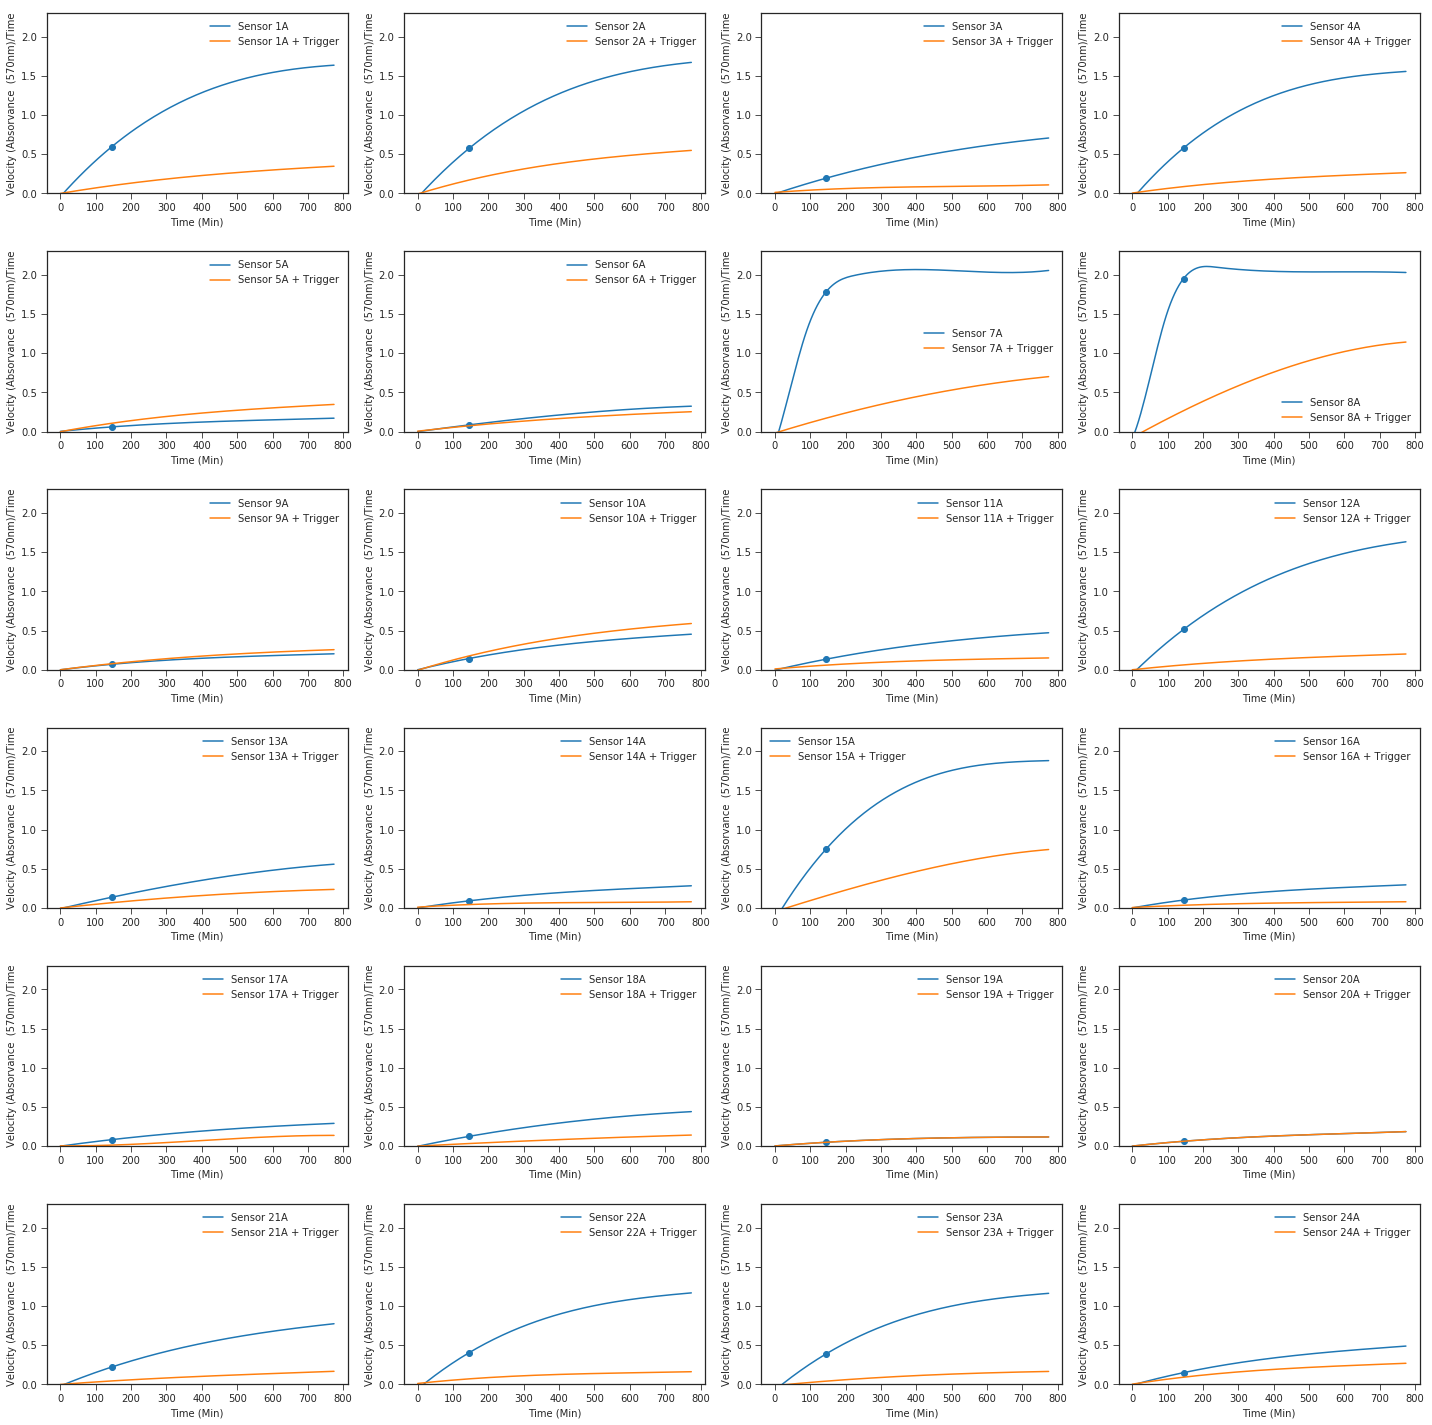

In [157]:
plt.figure(figsize=(20,20))
c=0
for i in range(len(names)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_A,str(names[i]))
    b=filt(result_AT,str(names[i]))
    
    tck_A = interpolate.splrep(a.Time, a.Y_value, s=0.1)
    tck_AT = interpolate.splrep(b.Time, b.Y_value, s=0.1)
    

    #plt.plot(xnew,ynew)
    
    xnew = np.arange(0, 780, 6)
    
    ynew_ON = interpolate.splev(xnew, tck_AT, der=0)
    ynew_OFF = interpolate.splev(xnew, tck_A, der=0)
    f = interpolate.interp1d(xnew, ynew_ON)
    ynew = f(xnew) 
    Y_200=f(145)
    plt.scatter(145,Y_200)
    #yder = interpolate.splev(xnew, tck_ON, der=1)
    
    plt.plot(xnew,ynew_ON,label="Sensor %s" % str(names[i]))
    plt.ylabel("Velocity (Absorvance  (570nm)/Time")
    plt.xlabel("Time (Min)")
    plt.plot(xnew,ynew_OFF,label="Sensor %s + Trigger"  % str(names[i]))
    plt.ylim(0,2.3)
    plt.legend(loc=0)
plt.tight_layout()
plt.savefig("try_spline.pdf",dpi=600)
#plt.savefig("SerieA.jpg",dpi=600)

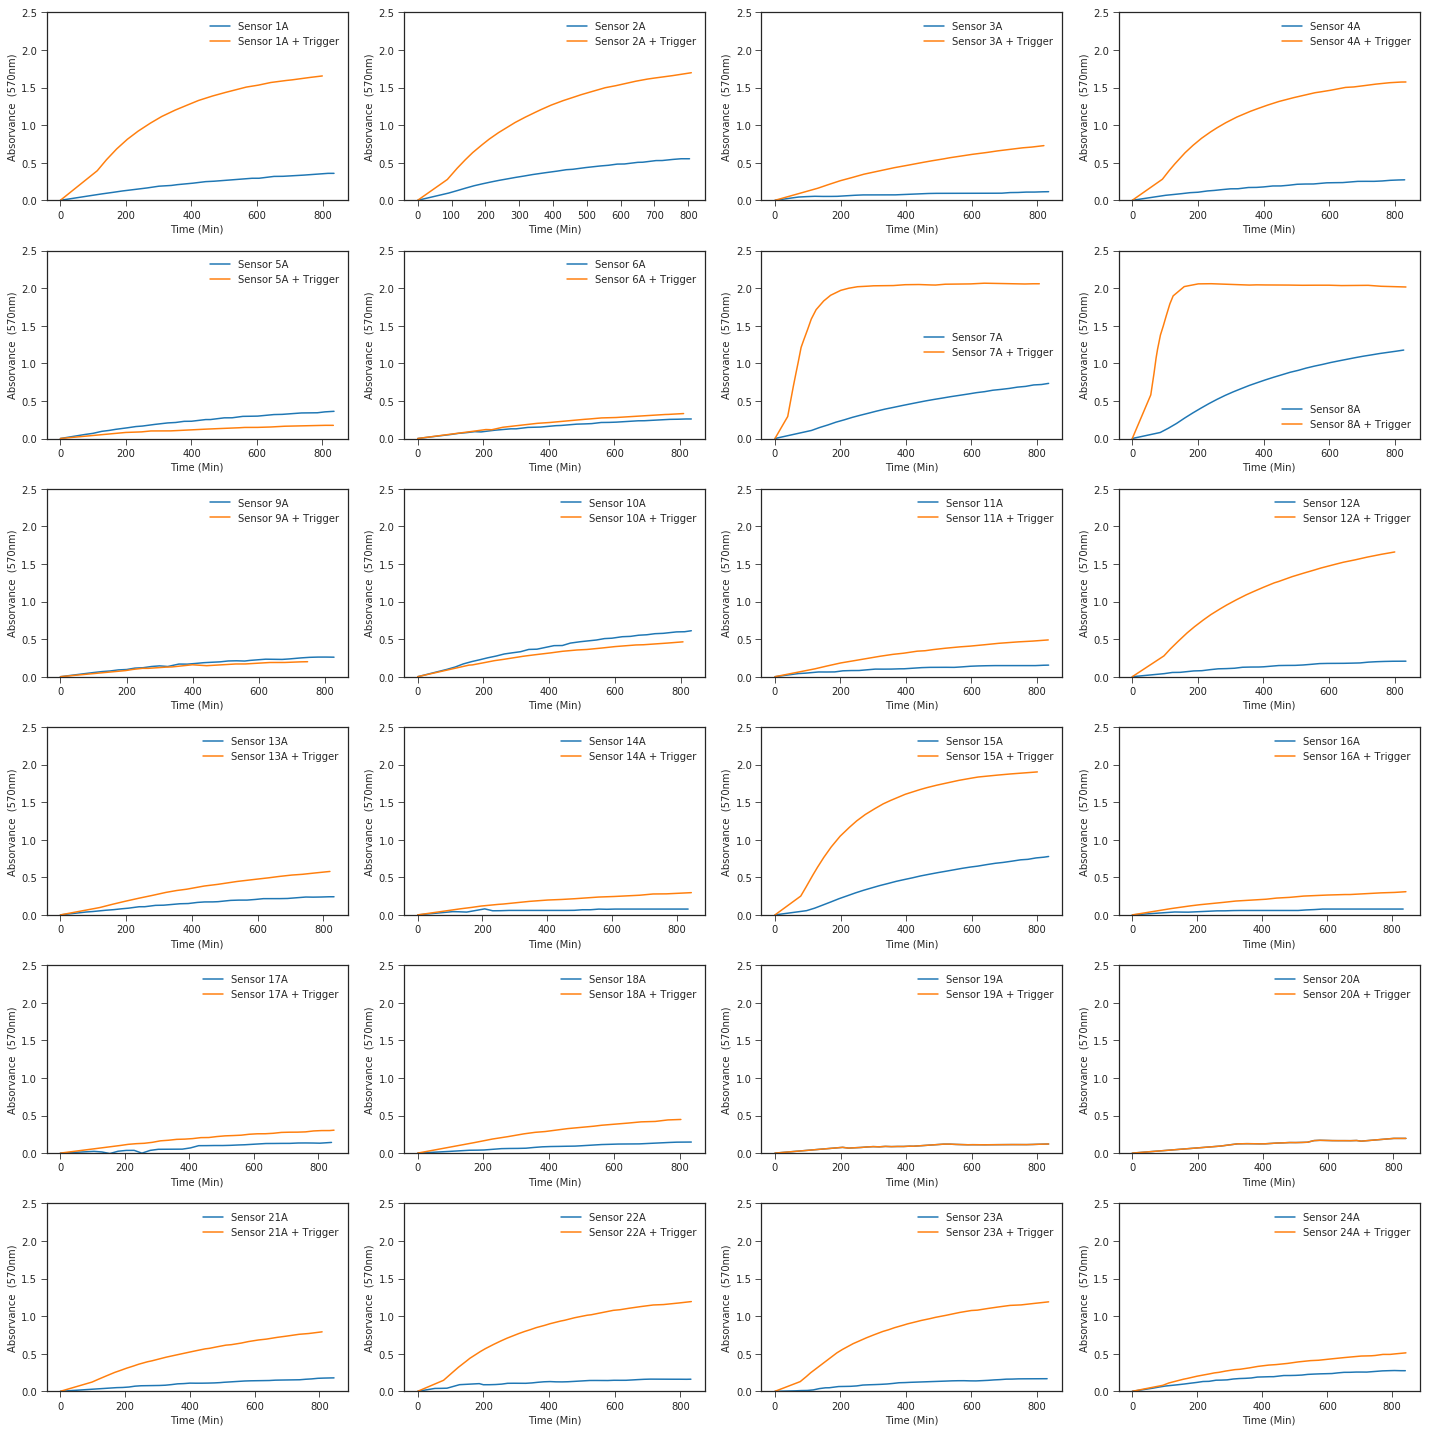

In [85]:
plt.figure(figsize=(20,20))
c=0
for i in range(len(names)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_A,str(names[i]))
    b=filt(result_AT,str(names[i]))
    plt.plot(a.Time,a.Y_value,label="Sensor %s" % str(names[i]))
    plt.ylabel("Absorvance  (570nm)")
    plt.xlabel("Time (Min)")
    plt.plot(b.Time,b.Y_value,label="Sensor %s + Trigger"  % str(names[i]))
    plt.ylim(0,2.5)
    plt.legend(loc=0)
plt.tight_layout()
plt.savefig("SerieA.pdf",dpi=600)
plt.savefig("SerieA.jpg",dpi=600)

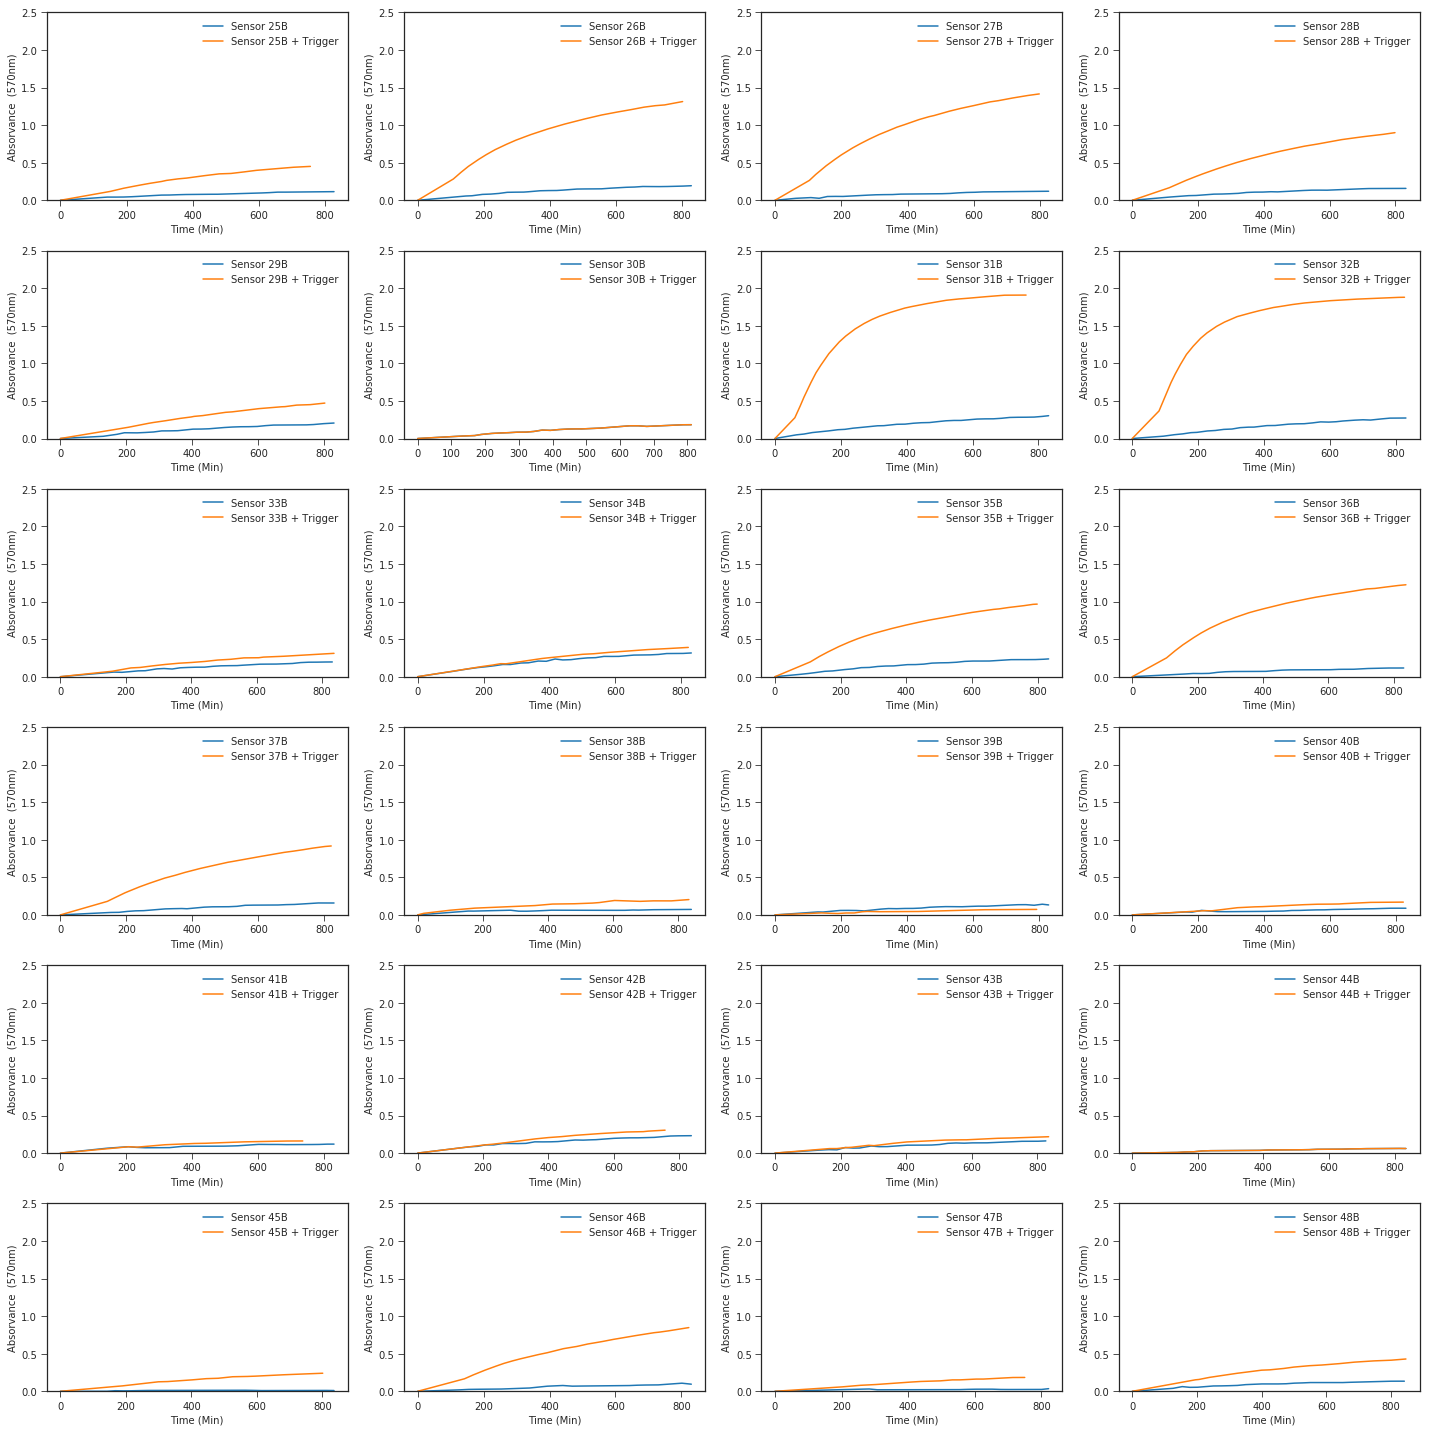

In [20]:
plt.figure(figsize=(20,20))
c=0
for i in range(len(names_B)):
    c=i+1
    ax=plt.subplot(6,4,c)
    a=filt(result_B,str(names_B[i]))
    b=filt(result_BT,str(names_B[i]))
    plt.plot(a.Time,a.Y_value,label="Sensor %s" % str(names_B[i]))
    plt.ylabel("Absorvance  (570nm)")
    plt.xlabel("Time (Min)")
    plt.plot(b.Time,b.Y_value,label="Sensor %s + Trigger"  % str(names_B[i]))
    plt.ylim(0,2.5)
    plt.legend(loc=0)
plt.tight_layout()
plt.savefig("SerieB.pdf",dpi=600)
plt.savefig("SerieB.jpg",dpi=600)

In [ ]:
    
xnew = np.arange(0, 780, 6)
xlin = np.arange(50, 180, 6)
ynew_ON = interpolate.splev(xnew, tck_AT, der=0)
ynew_ON_lin= interpolate.splev(xlin, tck_AT, der=0)


f = interpolate.interp1d(xnew, ynew_ON)
f_lin = interpolate.interp1d(xlin, ynew_ON_lin)
ylin = f(xlin) 
z = np.polyfit(xlin, ylin, 1)
y_line = xlin * z[0] + z[1]
plt.plot(xlin, y_line)
ynew = f(xnew) 
Y_200=f(200)
plt.plot(xnew,ynew)

In [21]:
names_B

['25B',
 '26B',
 '27B',
 '28B',
 '29B',
 '30B',
 '31B',
 '32B',
 '33B',
 '34B',
 '35B',
 '36B',
 '37B',
 '38B',
 '39B',
 '40B',
 '41B',
 '42B',
 '43B',
 '44B',
 '45B',
 '46B',
 '47B',
 '48B']

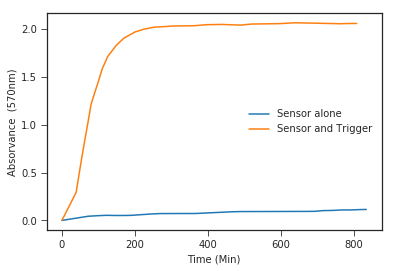

In [22]:
b=pd.read_csv("ZK/7A_T.csv",header=1,names=("Time","Y_value"))
a=pd.read_csv("ZK/7A.csv",header=1,names=("Time","Y_value"))
arow2=[0,0]
b.loc[len(b)] = arow2
b=b.sort_values(by=["Time"])

a=pd.read_csv("ZK/3A.csv",header=1,names=("Time","Y_value"))
a.loc[len(b)] = arow2
a=a.sort_values(by=["Time"])

plt.plot(a.Time,a.Y_value,label="Sensor alone")
plt.ylabel("Absorvance  (570nm)")
plt.xlabel("Time (Min)")
plt.plot(b.Time,b.Y_value,label="Sensor and Trigger")
plt.legend(loc=0)

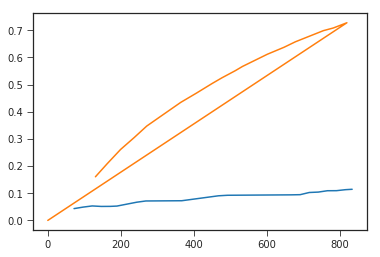

In [171]:
#Read results
b=pd.read_csv("ZK/3A_T.csv",header=1,names=("Time","Y_value"))
arow2=[0,0]
b.loc[len(b)] = arow2
b.sort_values
#b["Time"]=0
a=pd.read_csv("ZK/3A.csv",header=1,names=("Time","Y_value"))
plt.plot(a.Time,a.Y_value)
plt.plot(b.Time,b.Y_value)
        